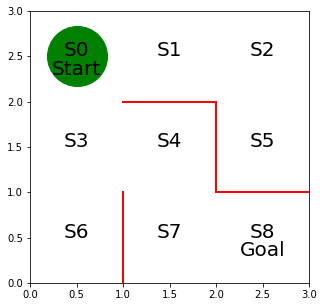

In [70]:
"""迷路課題実装　3*3 S0=>S8 green:actor"""
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

grid=np.array([[0,1,2,3],[0,1,2,3]])
fig=plt.figure(figsize=(5,5))
ax=plt.gca()
plt.xlim(0,3)
plt.ylim(0,3)
#赤い壁の作成
plt.plot((grid[0][1],grid[1][1]),(grid[0][1],grid[1][0]),color='red',linewidth=2)
plt.plot((grid[0][1],grid[1][2]),(grid[0][2],grid[1][2]),color='red',linewidth=2)
plt.plot((grid[0][2],grid[1][2]),(grid[0][2],grid[1][1]),color='red',linewidth=2)
plt.plot((grid[0][3],grid[1][2]),(grid[0][1],grid[1][1]),color='red',linewidth=2)

#テキストボックス
plt.text(0.5,0.5,'S6',size=20,ha='center')
plt.text(0.5,1.5,'S3',size=20,ha='center')
plt.text(0.5,2.5,'S0',size=20,ha='center')
plt.text(0.5,2.3,'Start',size=20,ha='center')
plt.text(1.5,0.5,'S7',size=20,ha='center')
plt.text(2.5,0.5,'S8',size=20,ha='center')
plt.text(2.5,0.3,'Goal',size=20,ha='center')
plt.text(1.5,1.5,'S4',size=20,ha='center')
plt.text(1.5,2.5,'S1',size=20,ha='center')
plt.text(2.5,1.5,'S5',size=20,ha='center')
plt.text(2.5,2.5,'S2',size=20,ha='center')

#初期位置に緑のマーク
line,=ax.plot(0.5,2.5,marker='o',color='g',markersize=60)
plt.show()

In [71]:
"""緑で示されたエージェントがどのように動くかを定める(policy)
   π(s,a):状態s(state)の時に行動a(action)を採用する確率はパラメータθで変化する方策πに従う
   
   エージェントの動きとしては上、下、右、左に動く可能性あり"""

'緑で示されたエージェントがどのように動くかを定める(policy)\n   π(s,a):状態s(state)の時に行動a(action)を採用する確率はパラメータθで変化する方策πに従う\n   \n   エージェントの動きとしては上、下、右、左に動く可能性あり'

In [72]:
#policy 順に上、下、右、左 動ける時を1,動けないときをン氏
theta_0=np.array([[np.nan,1,1,np.nan],
                  [np.nan,np.nan,1,1],
                  [np.nan,1,np.nan,1],
                  [1,1,1,np.nan],
                  [np.nan,1,np.nan,1],
                  [1,np.nan,np.nan,np.nan],
                  [1,np.nan,np.nan,np.nan],
                  [1,np.nan,1,np.nan]])

#policyを確率ベースに変換
#policy arrayを確率行列に変換
s,t=theta_0.shape
prob_array=np.zeros([s,t])

for i in range(s):
    prob_array[i,:]=theta_0[i,:]/np.nansum(theta_0[i,:])
    
prob_array=np.nan_to_num(prob_array)
print(prob_array[1,:])

[ 0.   0.   0.5  0.5]


In [73]:
#エージェントがpolicyに従ってゴールを目指す
state=5
direction=['up','down','right','left']
next_direction=np.random.choice(direction,p=prob_array[state,:])

if next_direction==direction[0]:
    next_state=state-3
elif next_direction==direction[1]:
    next_state=state+3
elif next_direction==direction[2]:
    next_state=state+1
elif next_direction==direction[3]:
    next_state=state-1
    
print(next_state)
    

2


In [74]:
#上の二つの動きを一般化
def policy_to_prob(theta):
    #policyの行列の形状を取得
    s,t=theta.shape
    #確率行列を初期化
    prob_array=np.zeros([s,t])
    
    for i in range(s):
        prob_array[i,:]=theta[i,:]/np.nansum(theta[i,:])
        
    #np.nanを0に
    prob_array=np.nan_to_num(prob_array)
    return prob_array

def get_next_state(prob_array,now_state):
    direction=['up','down','right','left']
    #direction listからある確率分布に従ってランダムに方策(policy)を選択
    next_d=np.random.choice(direction,p=prob_array[now_state,:])
    
    if next_d==direction[0]:
        next_state=now_state-3
    elif next_d==direction[1]:
        next_state=now_state+3
    elif next_d==direction[2]:
        next_state=now_state+1
    elif next_d==direction[3]:
        next_state=now_state-1
        
    return next_state

In [76]:
#迷路を解く

#最初の状態を設定
state=0
state_history=[state]

prob_array=policy_to_prob(theta_0)

#goalするまでloop
while True:
    next_state=get_next_state(prob_array,state)
    state_history.append(next_state)
    
    if next_state==8:
        break
    else:
        state=next_state
        
print(state_history)
print('labyrince is solved %d times required'%(len(state_history)-1))

[0, 3, 4, 7, 8]
labyrince is solved 4 times required


In [77]:
#goal目指す関数を実装
def get_goal(prob_array):
    #initialize
    state=0
    state_history=[state]
    goal=8
    
    while True:
        new_state=get_next_state(prob_array,state)
        state_history.append(new_state)
        
        if new_state==goal:
            break
        else:
            state=new_state
            
    return state_history
    
state_hitory=get_goal(prob_array)    
    

In [81]:
from matplotlib import animation
from IPython.display import HTML

#?
#agent actionを動画に
def init():
    line.set_data
    return (line,)

def animate(i):
    state=state_history[i]
    x=(state%3)+0.5
    y=2.5-int(state/3)
    line.set_data(x,y)
    return (line,)
    
    
anima=animation.FuncAnimation(fig,animate,init_func=init,frames=len(state_history),interval=20,repeat=False)
HTML(anima.to_html5_video())
    

RuntimeError: Requested MovieWriter (ffmpeg) not available